In [284]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [286]:
print("gedldlo")

gedldlo


In [288]:
import sys
sys.executable

'C:\\Users\\marioreyes\\AppData\\Local\\anaconda3\\python.exe'

In [290]:
print (np.__path__)

['C:\\Users\\marioreyes\\AppData\\Local\\anaconda3\\Lib\\site-packages\\numpy']


In [292]:
pd.__version__

'2.2.2'

In [294]:
np.__version__

'1.26.4'

In [354]:
df = pd.read_csv("movies.csv")
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [298]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [300]:
#Seeing if there are any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [356]:
#Cleaning up the data

#Changing date column into a date data type
df["released"] = df["released"].str.split("(").str.get(0).str.strip()
df["released"]=pd.to_datetime(df["released"], format="mixed")

#Changing genre and rating into category columsn
df["genre"]=df["genre"].astype("category")
df["rating"]=df["rating"].astype("category")

#Stripping any white space from name
df["name"] = df["name"].str.strip()

#Dropping all rows with NA or errors
df=df.dropna()

df.dtypes

name                object
rating            category
genre             category
year                 int64
released    datetime64[ns]
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
dtype: object

In [304]:
#Verifying that dropna() has worked
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [306]:
#Continuing to clean up data
df["budget"] = df["budget"].astype('int64')
df["votes"] = df["votes"].astype("int64")
df["gross"] = df["gross"].astype("int64")

#Looks like the date column does not always equal the year column
#We are converting the date into a str and then pull the first 4 values using a slicer
df["year_correct"] = df["released"].astype(str).str[:4]
df["year_correct"] = df["year_correct"].astype("int64")
df = df.sort_values(by=["gross"], ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [308]:
#Here is an example of a duplicate
df[df["company"] == "Marvel Studios"]

df[df["name"] == "Hellboy"]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
4482,Hellboy,PG-13,Action,2004,2004-04-02,6.8,312000,Guillermo del Toro,Guillermo del Toro,Ron Perlman,United States,66000000,99378985,Revolution Studios,122.0,2004
7471,Hellboy,R,Action,2019,2019-04-12,5.2,82000,Neil Marshall,Andrew Cosby,David Harbour,United States,50000000,55065289,Summit Entertainment,120.0,2019


In [310]:
df.info()
#Telling us there are 5421 values in each column

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 5445 to 3203
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          5421 non-null   object        
 1   rating        5421 non-null   category      
 2   genre         5421 non-null   category      
 3   year          5421 non-null   int64         
 4   released      5421 non-null   datetime64[ns]
 5   score         5421 non-null   float64       
 6   votes         5421 non-null   int64         
 7   director      5421 non-null   object        
 8   writer        5421 non-null   object        
 9   star          5421 non-null   object        
 10  country       5421 non-null   object        
 11  budget        5421 non-null   int64         
 12  gross         5421 non-null   int64         
 13  company       5421 non-null   object        
 14  runtime       5421 non-null   float64       
 15  year_correct  5421 non-null   int64     

In [312]:
#You can show all the rows
pd.set_option('display.max_rows', None)

#Shows you all of the entries in company
df["company"].sort_values(ascending=True).head()

#Shows you the distinct counts of the column company
#df["company"].drop_duplicates().sort_values(ascending=True)

#We can get rid of the duplicate company by using
#df["company"] = df["company"].drop_duplicates()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3525                          1492 Pictures
2929                          1492 Pictures
Name: company, dtype: object

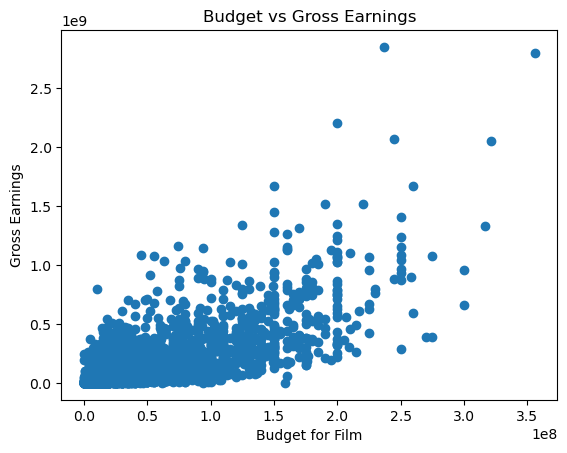

In [316]:
#Building scatter plot with budget vs gross
plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.show()

Text(0, 0.5, 'Gross Earnings')

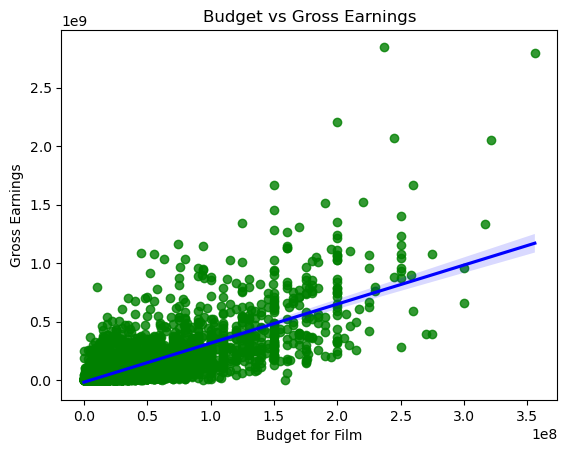

In [318]:
#Plotting using seaborn

sns.regplot(
    x="budget", y="gross", 
        data=df, 
            scatter_kws={"color":"green"}, 
                line_kws={"color":"blue"})

plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")

In [320]:
#a higher correlation means the objects influence one another
df.corr(numeric_only=True, method="pearson") #you can suse pearson, kendall, or spearman

#There is a high correaltion between budget and gross

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


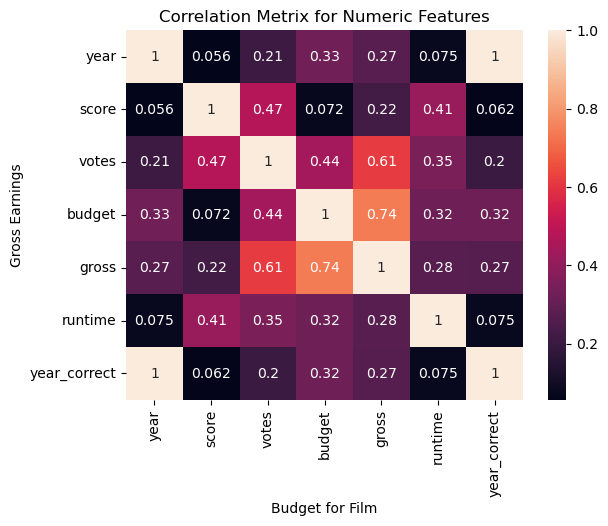

In [322]:
correlation_matrix = df.corr(numeric_only=True, method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Metrix for Numeric Features")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")

plt.show()

In [330]:
#Numerizing. Making the non numeric rows into numbers so we can use corr
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category") 
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized;

In [326]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


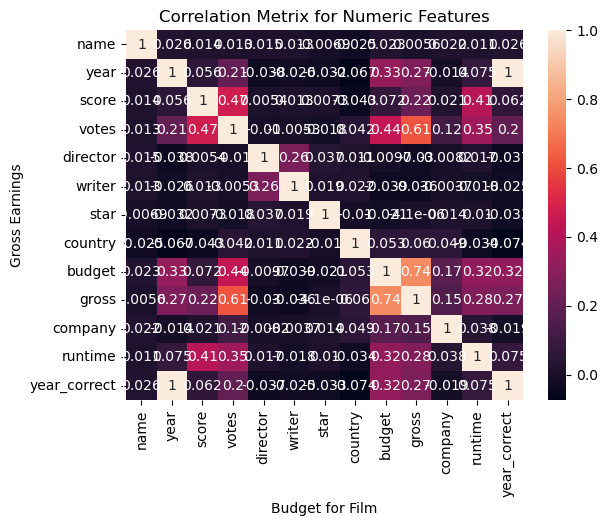

In [336]:
#Testing out the heat map using the new numbers for the non-numeric columns
correlation_matrix = df_numerized.corr(numeric_only=True, method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Metrix for Numeric Features")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")

plt.show()

In [340]:
df_numerized.corr(numeric_only=True)

,name,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
year,0.025542,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
score,0.014450,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569
budget,0.023392,0.327722,0.072001,0.439675,-0.009662,-0.039466,-0.021473,0.052977,1.000000,0.740247,0.170235,0.318695,0.320312
gross,0.005639,0.274321,0.222556,0.614751,-0.029560,-0.035885,-0.000004,0.060078,0.740247,1.000000,0.149553,0.275796,0.268721


In [342]:
correlation_mat = df_numerized.corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              year            0.025542
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct    0.025542
year          name            0.025542
              year            1.000000
              score           0.056386
              votes           0.206021
              director       -0.038354
              writer         -0.025908
              star           -0.032157
              country        -0.066748
              budget          0.327722
              gross           0.274321
              company        -0.014333
              runtime         0.075077
              year_correc

In [346]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

name          name            1.000000
year          year            1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
star          star            1.000000
year_correct  year_correct    1.000000
              year            0.998726
year          year_correct    0.998726
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
votes         score           0.474256
score         votes           0.474256
budget        votes           0.439675
votes         budget          0.439675
runtime       score           0.414068
score         runtime         0.414068
runtime       votes      

In [352]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]
high_corr

#Looks like votes and budgets have a high correlation to gross earnings
#Company and gross earnings have a low earnings 

name          name            1.000000
year          year            1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
star          star            1.000000
year_correct  year_correct    1.000000
              year            0.998726
year          year_correct    0.998726
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
dtype: float64